# Método Runge-Kutta Orden 4 (RK4) para resolver sistemas de ecuaciones diferenciales ordinarias de primer orden

El método de RK4 para aproximar la solución del P.V.I. vectorial de la forma

$$
\begin{aligned}
\begin{cases}
\mathbf{U}'(t) & = \mathbf{F}(t,\mathbf{U}(t)), \qquad a \leq t \leq b \\
\mathbf{U}(a) & = \mathbf{U}_a
\end{cases}
\end{aligned}
$$

propone la ecuación en diferencias
$$
\begin{aligned}
\mathbf{W}_0 & = \mathbf{U}_a \\
\mathbf{W}_{i+1} & = \mathbf{W}_i + \frac{h}{6} \left[ \mathbf{K}_1 + 2\mathbf{K}_2 + 2\mathbf{K}_3 + \mathbf{K}_4 \right]
\end{aligned}
$$

donde
$$
\begin{aligned}
\mathbf{K}_1 & = \mathbf{F} \left( t_i,\mathbf{W}_i \right)\\
\mathbf{K}_2 & = \mathbf{F} \left( t_i + \frac{h}{2},\mathbf{W}_i + \frac{h}{2}\mathbf{K}_1 \right)\\
\mathbf{K}_3 & = \mathbf{F} \left( t_i + \frac{h}{2},\mathbf{W}_i + \frac{h}{2}\mathbf{K}_2 \right)\\
\mathbf{K}_4 & = \mathbf{F} \left( t_{i+1},\mathbf{W}_i + h\mathbf{K}_3 \right)\\
\end{aligned}
$$


El código correspondiente a este método se presenta en la siguiente celda


In [1]:
def rk4sist(F,a,b,Ua,n):

    h = (b-a)/n                           #tamaño de paso
    T = np.linspace(a,b,n+1)              #discretización intervalo [a,b]
    U = np.empty((len(T),len(Ua)))        #creación matriz U para rellenar
  
    U[0] = Ua        #Valores iniciales

    #Método de RK4
    for i in range(0,n):
        K1 = np.array(F(T[i],U[i]))
        K2 = np.array(F(T[i]+(h/2),U[i]+(h/2)*K1))
        K3 = np.array(F(T[i]+(h/2),U[i]+(h/2)*K2))
        K4 = np.array(F(T[i] + h,U[i] + h*K3))
        U[i+1] = U[i] + (h/6)*(K1 + 2*K2 + 2*K3 + K4)  
    return T,U 


# Problema de aplicación.

A continuación se presenta un ejemplo del uso de RK4 para resolver el P.V.I.

Si $u_0(t) = y$, $u_1(t) = y'$ y $u_2(t) = y''$, entonces se tienen las siguientes equivalencias $u_0'(t) = u_1(t)$ y $u_1'(t) = u_2(t)$.

Se escribe como un P.V.I. vectorial de la forma $\mathbf{U}'(t) = \mathbf{F}(t,\mathbf{U}(t))$, en donde se tiene

$$
\begin{aligned}
\mathbf{U}(t) = \begin{bmatrix}
u_0(t) \\
u_1(t) \\
u_2(t)
\end{bmatrix}
\qquad
\text{y}
\qquad
\mathbf{F}(t,\mathbf{U}(t)) = \begin{bmatrix}
u_1(t) \\
\cos (u_2(t)) + \ln (t^2 +1) \\
\sin(u_1(t)) - 4 - \arctan (u_0(t))
\end{bmatrix}
\end{aligned}
$$

con sus condiciones iniciales
$$
\begin{aligned}
\mathbf{U}(1) = \begin{bmatrix}
1 \\
-1 \\
1
\end{bmatrix}
\end{aligned}
$$

Se hace uso del método de RK4 programado previamente, con el fin de aproximar las variables en el intervalo $1 \leq t \leq 4$ usando un tamaño de paso $h = 0.3$, es decir, se toman $n=10$ subintervalos.

A continuación se muestran las líneas de código usadas para definir las variables de entrada y hacer uso del método programado.


In [2]:
import numpy as np                      #librería para trabajar con arreglos
import matplotlib.pyplot as plt         #librería para trabajar gráficas
import pandas as pd                     #librería para ordenar datos (tablas)
import sys

#definición de las variables de entrada
F = lambda t,u: [u[1], np.cos(u[2]) + np.log(t**2 + 1), np.sin(u[1])-4 - np.arctan(u[0])]
a = 1
b = 4
Ua = np.array([1,-1,1])
n = 10

#uso del método de RK4
T,U = rk4sist(F,a,b,Ua,n)

#Imprimir resultados
np.set_printoptions(threshold=sys.maxsize)                        #opción para que imprima completamente las resultados    
resultados = np.insert(U, 0, T, axis=1)                           #juntar T y U en una sola matriz para mejor visualización
np.set_printoptions(formatter={"float": lambda x:"%0.8f"%(x)})    #formato de los números al imprimir (se usan 8 cifras decimales)
print(resultados)

[[1.00000000 1.00000000 -1.00000000 1.00000000]
 [1.30000000 0.77334257 -0.48241068 -0.61799655]
 [1.60000000 0.69581913 -0.08612712 -2.08203620]
 [1.90000000 0.69571889 0.07552197 -3.46377670]
 [2.20000000 0.76023877 0.41719498 -4.78722128]
 [2.50000000 0.98850090 1.15944444 -5.99743250]
 [2.80000000 1.47162531 2.05515241 -7.17037883]
 [3.10000000 2.19981820 2.74726080 -8.49703844]
 [3.40000000 3.09441032 3.21337634 -10.01141152]
 [3.70000000 4.15732907 3.95566707 -11.71516109]
 [4.00000000 5.50696789 5.04101429 -13.60233281]]


Finalmente se preparan las gráficas correspondientes en cada caso

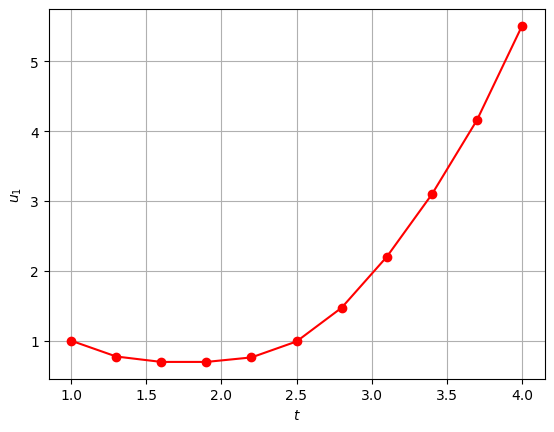

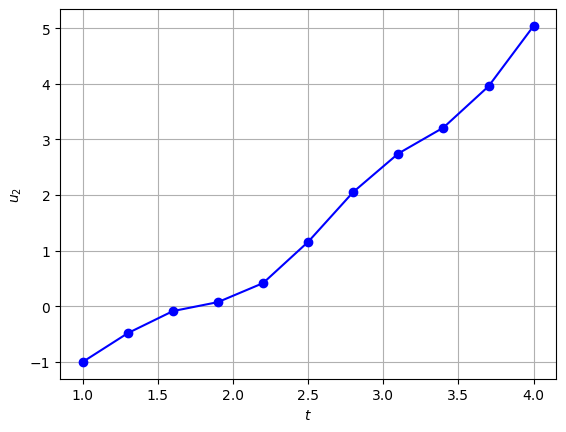

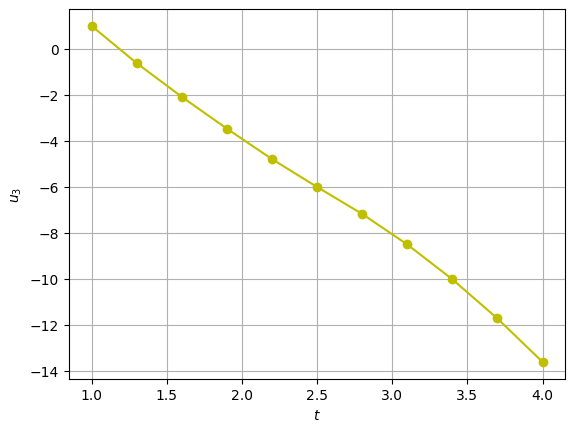

In [3]:
#se extraen los valores de la matriz U
u1 = U[:,0]
u2 = U[:,1]
u3 = U[:,2]


#Gráficas
plt.figure(1)
plt.plot(T,u1,'ro')
plt.plot(T,u1,'r')
plt.xlabel("$t$")
plt.ylabel("$u_1$")
plt.grid()
plt.show()

plt.figure(2)
plt.plot(T,u2,'bo')
plt.plot(T,u2,'b')
plt.xlabel("$t$")
plt.ylabel("$u_2$")
plt.grid()
plt.show()

plt.figure(3)
plt.plot(T,u3,'yo')
plt.plot(T,u3,'y')
plt.xlabel("$t$")
plt.ylabel("$u_3$")
plt.grid()
plt.show()